In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
from imblearn.combine import SMOTEENN

In [26]:
telco = pd.read_csv('Churn.csv')

In [ ]:
telco.drop('Phone',axis=1,inplace=True)
telco.drop('State',axis=1,inplace=True)
telco.drop('Area_Code', axis=1, inplace=True)
for col in  ['Intl_Plan', 'Vmail_Plan', 'Churn']:
    telco[col] = telco[col].replace({'yes':1,'no':0})

In [27]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [8]:
col_scale = [col for col in telco.columns if col not in ['Intl_Plan', 'Vmail_Plan', 'Churn', 'Vmail_Message']]

In [28]:
len(col_scale)

14

In [10]:
scaler = StandardScaler()
telco[col_scale] = scaler.fit_transform(telco[col_scale])

In [11]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3.333000e+03,3333.000000,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3333.000000,3333.000000,3333.000000,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.470971e-16,8.099010,7.312216e-16,-6.821892e-17,7.887813e-17,-3.336332e-16,8.527366e-18,0.144914,0.096910,0.276628,-1.934646e-16,-2.835349e-16,3.288365e-16,1.385697e-16,-4.903235e-17,-4.370275e-17,-8.527366e-18,2.728757e-16
std,1.000150e+00,13.688365,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,0.352067,0.295879,0.447398,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,0.000000,-3.301096e+00,-3.963622e+00,-3.513648e+00,-3.667413e+00,-1.188218e+00,0.000000,0.000000,0.000000,-5.005247e+00,-3.301162e+00,-5.025911e+00,-3.963679e+00,-3.429870e+00,-3.515366e+00,-1.820289e+00,-3.668210e+00
25%,-6.797448e-01,0.000000,-6.624241e-01,-6.780300e-01,-6.698545e-01,-6.223690e-01,-4.279320e-01,0.000000,0.000000,0.000000,-6.695701e-01,-6.623760e-01,-6.583610e-01,-6.783123e-01,-6.699340e-01,-6.676792e-01,-6.011951e-01,-6.164341e-01
50%,-1.627644e-03,0.000000,-6.887677e-03,8.276141e-03,6.485803e-03,2.246393e-02,-4.279320e-01,0.000000,0.000000,0.000000,2.812491e-02,-6.730063e-03,-5.738630e-03,8.459274e-03,-5.505089e-03,4.691242e-03,-1.948306e-01,2.045823e-02
75%,6.513740e-01,20.000000,6.725198e-01,6.768330e-01,6.808485e-01,6.672969e-01,3.323545e-01,0.000000,0.000000,1.000000,6.759846e-01,6.726790e-01,6.970854e-01,6.766695e-01,6.589239e-01,6.814562e-01,6.178983e-01,6.706192e-01
max,3.564766e+00,51.000000,3.140422e+00,3.209066e+00,3.839081e+00,3.497397e+00,5.654360e+00,1.000000,1.000000,1.000000,3.217588e+00,3.140803e+00,3.508382e+00,3.207980e+00,3.827739e+00,3.836763e+00,6.307001e+00,3.496829e+00


In [12]:
X= telco.drop(['Churn'], axis=1)
y= telco['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [13]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
# Ensemble Techniques - Basic Models with weak classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,  GradientBoostingClassifier, RandomForestClassifier
models = [RandomForestClassifier(), AdaBoostClassifier(), AdaBoostClassifier(),BaggingClassifier(), GradientBoostingClassifier()]
for model in models:
    model.fit(X_train,y_train)
    print(f"{model} : Results\n")
    print(f"Accuracy score for Train data: {model.score(X_train , y_train)}")
    test_pred = model.predict(X_test)
    print(f"Accuracy Score for Test data: {accuracy_score(y_test, test_pred)}\n")
    print(f"Classification report \n {classification_report(y_test,test_pred)}\n")
    print(f"Matrice de Confusion \n){confusion_matrix(y_test,test_pred)}\n")

RandomForestClassifier() : Results

Accuracy score for Train data: 0.9995713673381912
Accuracy Score for Test data: 0.954

Classification report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       857
           1       0.96      0.71      0.81       143

    accuracy                           0.95      1000
   macro avg       0.96      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000


Matrice de Confusion 
)[[853   4]
 [ 42 101]]

AdaBoostClassifier() : Results

Accuracy score for Train data: 0.8915559365623661
Accuracy Score for Test data: 0.877

Classification report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       857
           1       0.64      0.32      0.43       143

    accuracy                           0.88      1000
   macro avg       0.77      0.65      0.68      1000
weighted avg       0.86      0.88      0.86      1000


Matrice

In [18]:

sm = SMOTEENN()

X_resapmled, y_resapmled = sm.fit_resample(X,y)

In [19]:

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resapmled,y_resapmled, test_size=0.3, random_state=42)

In [20]:
Xr_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 3928 to 860
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3351 non-null   float64
 1   Vmail_Message   3351 non-null   int64  
 2   Day_Mins        3351 non-null   float64
 3   Eve_Mins        3351 non-null   float64
 4   Night_Mins      3351 non-null   float64
 5   Intl_Mins       3351 non-null   float64
 6   CustServ_Calls  3351 non-null   float64
 7   Intl_Plan       3351 non-null   int64  
 8   Vmail_Plan      3351 non-null   int64  
 9   Day_Calls       3351 non-null   float64
 10  Day_Charge      3351 non-null   float64
 11  Eve_Calls       3351 non-null   float64
 12  Eve_Charge      3351 non-null   float64
 13  Night_Calls     3351 non-null   float64
 14  Night_Charge    3351 non-null   float64
 15  Intl_Calls      3351 non-null   float64
 16  Intl_Charge     3351 non-null   float64
dtypes: float64(14), int64(3)
memory

In [21]:
y_resapmled.value_counts()

1    2778
0    2010
Name: Churn, dtype: int64

In [23]:
Xr_train

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
3928,-1.282111,0,-1.456219,2.100286,-0.767658,1.242792,0.307840,1,0,0.376972,-1.456496,0.080906,2.100369,-1.922963,-0.769400,0.604796,1.243522
1569,0.023488,0,0.815746,0.834604,-1.049554,0.631473,1.092641,1,0,-0.968582,0.815258,-0.507756,0.834441,-1.743242,-1.050007,1.430627,0.630813
1237,-0.378359,33,1.346419,0.179853,-2.093729,0.595649,1.092641,0,1,0.576314,1.346687,-0.306949,0.180152,-0.107725,-2.095917,-0.194831,0.591008
103,-0.830437,0,1.052621,0.444120,-2.046266,1.061361,-0.427932,0,0,0.227466,1.052889,0.245270,0.444652,-1.078813,-2.047577,-1.007560,1.055408
4273,0.457351,0,-1.282450,-1.584263,-0.606404,-0.129811,2.459323,0,0,0.626750,-1.282899,-0.398401,-1.585312,0.228738,-0.605107,1.672486,-0.132627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.078635,0,-0.748985,1.356502,-0.287731,-0.162828,-0.226945,0,0,-0.241085,-0.748734,-0.189248,1.356699,1.309842,-0.288188,-1.114985,-0.161637
466,-0.277898,0,-1.288581,-1.249952,-0.814220,0.273232,0.332354,0,0,-0.619735,-1.288858,0.395875,-1.249075,1.067803,-0.812700,0.211534,0.272561
3092,0.957302,42,-0.271261,-0.987525,0.269006,0.718211,1.475002,0,1,0.206765,-0.270887,0.440512,-0.986416,-1.824529,0.269299,-0.197202,0.714234
3772,0.059981,33,1.447776,0.742144,-0.482418,-1.128598,-0.024945,0,1,0.063524,1.447746,0.919552,0.742514,-1.015970,-0.483879,-0.361383,-1.129698


AdaBoostClassifier() : Results

Accuracy score for Train data: 0.8959571938168847
Accuracy Score for Test data: 0.9043659043659044

Classification report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       617
           1       0.92      0.91      0.92       826

    accuracy                           0.90      1443
   macro avg       0.90      0.90      0.90      1443
weighted avg       0.90      0.90      0.90      1443


Matrice de Confusion 
)[[551  66]
 [ 72 754]]



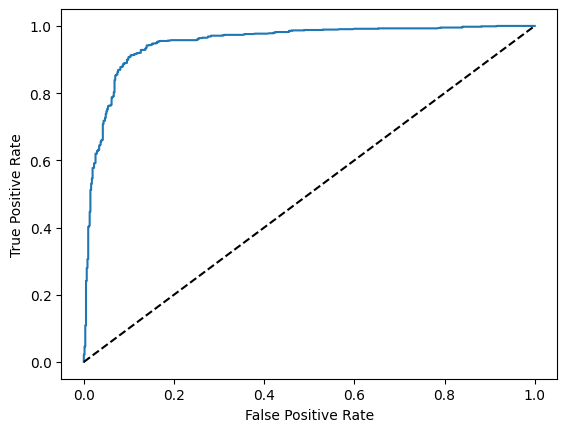

AdaBoostClassifier() : Results

Accuracy score for Train data: 0.8959571938168847
Accuracy Score for Test data: 0.9043659043659044

Classification report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       617
           1       0.92      0.91      0.92       826

    accuracy                           0.90      1443
   macro avg       0.90      0.90      0.90      1443
weighted avg       0.90      0.90      0.90      1443


Matrice de Confusion 
)[[551  66]
 [ 72 754]]



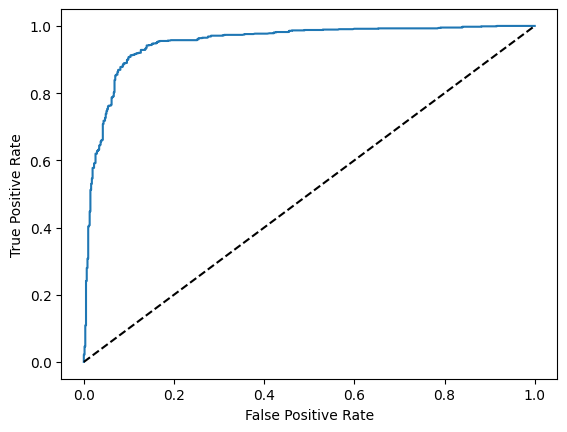

BaggingClassifier() : Results

Accuracy score for Train data: 0.9955410225921522
Accuracy Score for Test data: 0.9556479556479557

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       617
           1       0.97      0.95      0.96       826

    accuracy                           0.96      1443
   macro avg       0.95      0.96      0.95      1443
weighted avg       0.96      0.96      0.96      1443


Matrice de Confusion 
)[[594  23]
 [ 41 785]]



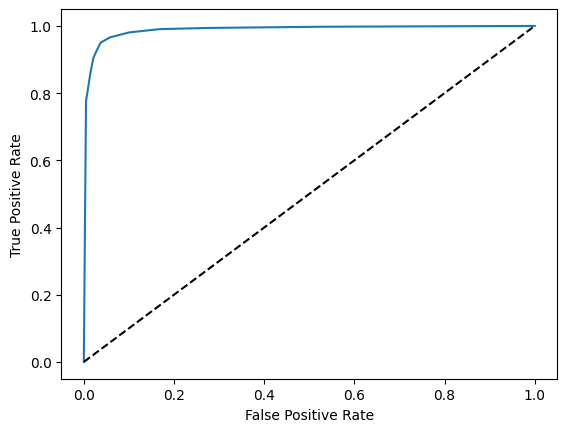

GradientBoostingClassifier() : Results

Accuracy score for Train data: 0.9595719381688466
Accuracy Score for Test data: 0.9556479556479557

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       617
           1       0.96      0.96      0.96       826

    accuracy                           0.96      1443
   macro avg       0.95      0.96      0.95      1443
weighted avg       0.96      0.96      0.96      1443


Matrice de Confusion 
)[[588  29]
 [ 35 791]]



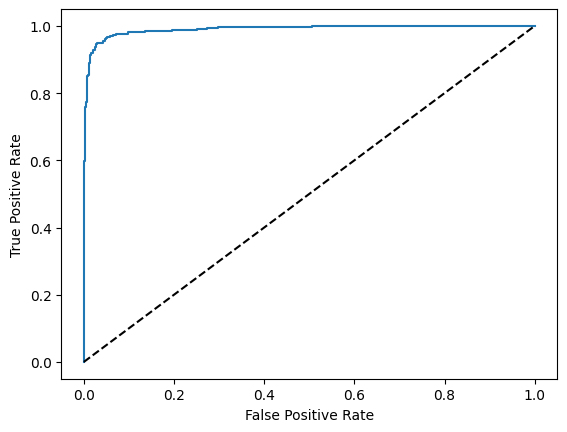

In [18]:
# Ensemble Techniques - Basic Models with weak classifiers
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,  GradientBoostingClassifier
models = [AdaBoostClassifier(), AdaBoostClassifier(),BaggingClassifier(), GradientBoostingClassifier()]
for model in models:
    model.fit(Xr_train,yr_train)
    print(f"{model} : Results\n")
    print(f"Accuracy score for Train data: {model.score(Xr_train , yr_train)}")
    test_predr = model.predict(Xr_test)
    print(f"Accuracy Score for Test data: {accuracy_score(yr_test, test_predr)}\n")
    print(f"Classification report \n {classification_report(yr_test,test_predr)}\n")
    print(f"Matrice de Confusion \n){confusion_matrix(yr_test,test_predr)}\n")
    # Generate the probabilities
    y_pred_prob = model.predict_proba(Xr_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(yr_test, y_pred_prob)
    plt.plot(fpr, tpr)
    # Add labels and diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], "k--")
    plt.show()

In [19]:
GB = GradientBoostingClassifier()
GB.fit(Xr_train,yr_train)
y_pred = GB.predict(Xr_test)
print(f"Accuracy score for Train data: {model.score(Xr_train , yr_train)}")
print(f"Accuracy Score for Test data: {accuracy_score(yr_test, y_pred)}\n")
print(f"Classification report \n {classification_report(yr_test,y_pred)}\n")
print(f"Matrice de Confusion \n){confusion_matrix(yr_test,y_pred)}\n")


Accuracy score for Train data: 0.9595719381688466
Accuracy Score for Test data: 0.954954954954955

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       617
           1       0.96      0.96      0.96       826

    accuracy                           0.95      1443
   macro avg       0.95      0.95      0.95      1443
weighted avg       0.96      0.95      0.95      1443


Matrice de Confusion 
)[[587  30]
 [ 35 791]]



In [20]:
"""import pickle
filename= 'GB.pkl'
pickle.dump(GB, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_test_score = load_model.score(Xr_test,yr_test)
model_test_score"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-20-d171e66ee56d>, line 6)